In [58]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import sklearn
import pickle

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Raw data collection and processing into pandas data frame

In [59]:
df = pd.read_csv("Loan_Default.csv")

## Do profiling to get overall idea about the data distribution

In [60]:
#prof = ProfileReport(df, title = 'Loan Dataset', explorative = True)

#prof.to_file('my_report.html')


## Remove ID and year columns since ID is just unique identifier, and year is 2019 for all

In [61]:

df = df.drop('ID', axis=1)
df = df.drop('year', axis=1)

## Checking for missing values from columns

In [62]:
df = df.dropna(axis = 1)

## Checking for rows with missing values in the columns

In [63]:
df = df.dropna(axis = 0)

## Checking if dataset has duplicates rows and droping them


In [64]:
df = df.drop_duplicates()

## Inorder to have data consistency converting the 'Region' column to have lowercase values

In [65]:
df['Region'] = df['Region'].str.lower()

# df.head()

## The dataset has incorrect spelling for the the column 'Security_Type' - correcting this


In [66]:

df['Region'] = df['Region'].replace('indriect','indirect')

# df.columns

## Scaling the 'property_value' in the dataset to optimise the results


In [ ]:
df[['loan_amount']] = StandardScaler().fit_transform(df[['loan_amount']])


# df.head()

## Define numeric data types

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

## Checking for outliers

In [ ]:
for i in df.select_dtypes(include=numerics).columns:
    mean = np.mean(df.select_dtypes(include=numerics)[i], axis=0)
    sd = np.std(df.select_dtypes(include=numerics)[i], axis=0)
    if i in ['ID']:
        continue
    lt = mean - 3 * sd
    rt = mean + 3 * sd
    col = i
    df = df.query(("{0} >= @lt & {0} <= @rt".format(col)))

print(df.shape)

## Correlation Heatmap

In [ ]:
sns.heatmap(df.corr(), annot=True)

## Changing total_units from string format as 1U, 2U ... to 1, 2

In [ ]:
df['total_units'] = df['total_units'].astype(str).str.replace('U', '').astype(int)
print(df.shape)

## Logic to print graphs in groups of size of mx

In [ ]:
grp = 0
mx = 4
done = []

In [ ]:
# plot every feature
def categorical_feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Status', col=feature, kind='count', data=df, palette="cool_r");
    # ax.xaxis.set_label_position('top')
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    ax.set_title(f"Distribution of feature {feature} wrt Output", y = 1.1, loc = 'left')



## Skip the below columns to plot because of high cardinality leading to higher cognitive overload

In [ ]:
skip = ['loan_amount', 'Credit_Score', 'Status']

## for every mx number of columns, plot the box

In [ ]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break

In [ ]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break
# format validation

In [ ]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break


In [ ]:
for i in df.columns:
    if i in skip or i in done:
        continue
    done.append(i)
    grp += 1
    categorical_feature_plot_with_target(i)
    if grp == mx:
        grp = 0
        break

## Bar plot against Status 0

In [ ]:
status0 = df[df['Status'] == 0]
for i in status0.columns:
    plt.bar(status0[i].unique(), status0[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + i + ' with Status 0')
    plt.show()









## Bar plot against Status 1

In [ ]:
status1 = df[df['Status'] == 1]
for i in status1.columns:
    plt.bar(status1[i].unique(), status1[i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title('Bar plot of ' + i + ' with Status 1')
    plt.show()


## Pair Plot

In [ ]:
sns.pairplot(df.drop(['Status'], axis=1))
plt.title('Pair plot')
plt.show()


In [ ]:

status1 = df[df['Status'] == 1]
s = pd.Series(status1['Credit_Score'], name = 'as')
ax = s.plot.kde()


In [ ]:

status1 = df[df['Status'] == 0]
s = pd.Series(status1['Credit_Score'], name = 'as')
ax = s.plot.kde()


In [ ]:

status1 = df[df['Status'] == 1]
s = pd.Series(status1['loan_amount'])
ax = s.plot.kde()

In [ ]:

status1 = df[df['Status'] == 0]
s = pd.Series(status1['loan_amount'])
ax = s.plot.kde()

In [ ]:
#df.to_csv('final_dataset.csv')

df.columns

In [ ]:
#Encoding the categorical variables

In [ ]:
#Seperating the categorical and numerical columns based on the datatype

datatype = pd.DataFrame(df.dtypes).reset_index()
#print(datatype)
categorical = []
numerical = []
for i, j in zip(datatype['index'], datatype[0]):
    if j == 'object':
        categorical.append(i)
        
    else:
        numerical.append(i)
        
        
print(categorical)

print(numerical)

# Binary variables
binary_variables = ['Security_Type', 'co-applicant_credit_type', 'Secured_by',
               'lump_sum_payment', 'interest_only', 'construction_type', 'business_or_commercial',
               'open_credit', 'Credit_Worthiness','Status']


In [ ]:
binary_variables

In [ ]:
df.columns

In [ ]:
df[binary_variables]

In [ ]:
categorical

In [ ]:
BinaryEncoder = LabelEncoder()

#for i in binary_variables:
    #df[i] = labelEncoder.fit_transform(df[i])

BinaryEncoder.fit

In [ ]:
#labelEncoder = LabelEncoder()

#for i in binary_variables:
   # df[i] = labelEncoder.fit_transform(df[i])


# df.columns
# print("after cols")
df_categorical = df[categorical]
#df_categorical.drop(columns=binary_variables,axis = 1, inplace=True)

df_categorical.columns

#Using one hot encoding

oneHotEncoder_categorical = OneHotEncoder()
df_onehot = oneHotEncoder_categorical.fit_transform(df_categorical)
df_enc_categorical = pd.DataFrame(df_onehot.toarray())


# Column names
print(oneHotEncoder_categorical.categories_)

oneHotEncoder_categorical.categories_

cat_columns = ['Female', 'Joint', 'Male', 'Sex Not Available',
               'type1', 'type2', 'type3',
               'ir', 'pr', 'sr',
               'CIB', 'CRIF', 'EQUI', 'EXP',
               'north', 'north-east', 'central', 'south']

#df_enc_categorical.columns = cat_columns
df.drop(columns=df_categorical.columns, inplace=True)
# Concat
df_merged = pd.concat([df, df_enc_categorical], axis=1, join='inner')

print("done")

df_merged

df_merged.columns

In [ ]:
#Splitting the data into training set and test set


df_merged.columns = df_merged.columns.astype(str)

training_set, testing_set = train_test_split(df_merged, test_size=0.4, random_state=42)

y_train = training_set['Status']
X_train = training_set.drop(columns=['Status'], axis = 1)
y_test = testing_set['Status']
X_test = testing_set.drop(columns=['Status'])





In [ ]:
df_merged.columns
column_names = oneHotEncoder_categorical.get_feature_names_out()
print(column_names)


In [ ]:
X_train.shape

In [ ]:
print(X_test)

# Model 1 - Random Forest Classifier

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
X_test.shape

In [ ]:
randomForest = RandomForestClassifier()


# Fitting the model

randomForest.fit(X_train, y_train)

with open('randomForest.pkl', 'wb') as f:
    pickle.dump(randomForest, f)
# Predictions

predict = randomForest.predict(X_test)

#Plotting the confusion matrix

confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))


print("done")


In [ ]:
# Plotting the confusion matrix as heatmap
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [ ]:

print(classification_report(y_test,predict))

# Model 2 - Logistic Regression

In [ ]:
logmodel = LogisticRegression(max_iter=100000)
logmodel.fit(X_train,y_train)
with open('logmodel.pkl', 'wb') as f:
    pickle.dump(logmodel, f)
predict = logmodel.predict(X_test)
cols = X_test.columns.tolist()

# print("itssss", cols)

In [ ]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

In [ ]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
print(classification_report(y_test,predict))

# Model 3 - Neural Network


In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=[10,10], max_iter=3000)
clf.fit(X_train, y_train)

with open('clf.pkl', 'wb') as f:
    pickle.dump(clf, f)
predict=clf.predict(X_test)

In [ ]:

confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)


In [ ]:
print(accuracy_score(y_test, predict))

accuracy = accuracy_score(y_test, predict)*100
print('Accuracy of Neural Networks model is equal ' + str(round(accuracy, 2)) + ' %.')
print(classification_report(y_test,predict))

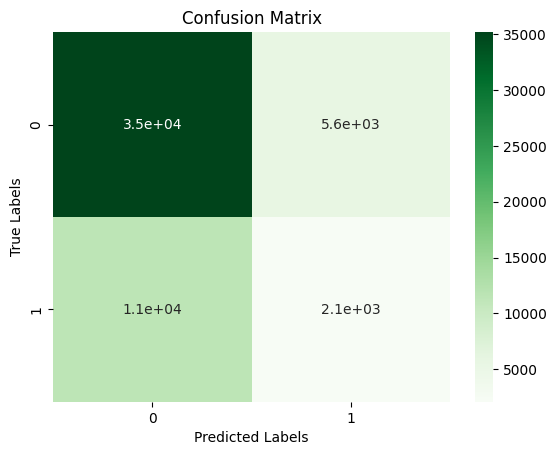

In [67]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

# Model 4 - Naive Bayes Classifier

In [68]:
NB = GaussianNB()
NB.fit(X_train,y_train)
with open('NB.pkl', 'wb') as f:
    pickle.dump(NB, f)
predict=NB.predict(X_test)

In [74]:
cnt = 0
selected_rows = []
for p in range(len(predict)):
    if predict[p] == 1 and X_test.iloc[p][0] >= 0:
        selected_rows.append(X_test.iloc[p])

df = pd.DataFrame(selected_rows)

# Write the dataframe to a CSV file
df.to_csv('selected_rows.csv', index=False)


In [ ]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

In [ ]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(classification_report(y_test,predict))

# Model 5 - Gradient Boosting Classifier

In [ ]:
gdboost = GradientBoostingClassifier()
gdboost.fit(X_train,y_train)
with open('gdboost.pkl', 'wb') as f:
    pickle.dump(gdboost, f)
predict=gdboost.predict(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

In [ ]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(classification_report(y_test,predict))

# Model 6 - Decision Tree Classification

In [ ]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
with open('tree.pkl', 'wb') as f:
    pickle.dump(tree, f)
predict = tree.predict(X_test)

In [ ]:
confusionMatrix = confusion_matrix(y_test, predict)
print(confusionMatrix)
print(accuracy_score(y_test, predict))

In [ ]:
sns.heatmap(confusionMatrix, annot=True, cmap='Greens')


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
print(classification_report(y_test,predict))

In [ ]:
print("DONE")

In [ ]:
def getLogisticClassification(X_NEW_TEST):
    predict = logmodel.predict(X_NEW_TEST)
    return predict

def getNeuralNetworkClassification(X_NEW_TEST):
    predict = randomForest.predict(X_NEW_TEST)
    return predict

def getRandomForestClassification(X_NEW_TEST):
    predict = clf.predict(X_NEW_TEST)
    return predict

def getNaiveBaseClassification(X_NEW_TEST):
    predict = NB.predict(X_NEW_TEST)
    return predict

def getGDBoostClassification(X_NEW_TEST):
    predict = gdboost.predict(X_NEW_TEST)
    return predict

def getDecisionTreeClassification(X_NEW_TEST):
    predict = tree.predict(X_NEW_TEST)
    return predict